Prediction of Agriculture Crop Production in India

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as py

In [10]:
# Loading data from local drive

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving datafile (1).csv to datafile (1).csv
Saving datafile (2).csv to datafile (2).csv
Saving datafile (3).csv to datafile (3).csv
Saving datafile.csv to datafile.csv
Saving produce.csv to produce (1).csv
User uploaded file "datafile (1).csv" with length 3239 bytes
User uploaded file "datafile (2).csv" with length 7422 bytes
User uploaded file "datafile (3).csv" with length 10865 bytes
User uploaded file "datafile.csv" with length 812 bytes
User uploaded file "produce (1).csv" with length 82658 bytes


In [11]:
#Load the data using pandas read functions
d1 = pd.read_csv('datafile (1).csv')
d2 = pd.read_csv('datafile (2).csv')
d3 = pd.read_csv('datafile (3).csv')
d4 = pd.read_csv('datafile.csv')

In [12]:
d1 = pd.read_csv('datafile (1).csv')
d1 = d1.rename(columns={
    'Crop': 'Crop',
    'State': 'State',
    'Cost of Cultivation (`/Hectare) A2+FL': 'Cost_A2_FL',
    'Cost of Cultivation (`/Hectare) C2': 'Cost_C2',
    'Cost of Production (`/Quintal) C2': 'Cost_Production',
    'Yield (Quintal/ Hectare) ': 'Yield'
})

d1.head().style.set_properties(**{'background-color':'lightblue','color':'black','border-color':'#8b8c8c'})

,Crop,State,Cost_A2_FL,Cost_C2,Cost_Production,Yield
0,ARHAR,Uttar Pradesh,9794.050000,23076.740000,1941.550000,9.830000
1,ARHAR,Karnataka,10593.150000,16528.680000,2172.460000,7.470000
2,ARHAR,Gujarat,13468.820000,19551.900000,1898.300000,9.590000
3,ARHAR,Andhra Pradesh,17051.660000,24171.650000,3670.540000,6.420000
4,ARHAR,Maharashtra,17130.550000,25270.260000,2775.800000,8.720000


In [13]:
#check the shape of the data
print(f' The dataset contains {d1.shape[1]} columns and {d1.shape[0]} rows')
# Print the column names
print(d1.columns)

 The dataset contains 6 columns and 49 rows
Index(['Crop', 'State', 'Cost_A2_FL', 'Cost_C2', 'Cost_Production', 'Yield'], dtype='object')


In [14]:
d1.info()
d1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             49 non-null     object 
 1   State            49 non-null     object 
 2   Cost_A2_FL       49 non-null     float64
 3   Cost_C2          49 non-null     float64
 4   Cost_Production  49 non-null     float64
 5   Yield            49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


,Cost_A2_FL,Cost_C2,Cost_Production,Yield
count,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735
std,13561.435306,20095.783569,1104.990472,245.293123
min,5483.540000,7868.640000,85.790000,1.320000
25%,12774.410000,19259.840000,732.620000,9.590000
50%,17022.000000,25909.050000,1595.560000,13.700000
75%,24731.060000,35423.480000,2228.970000,36.610000
max,66335.060000,91442.630000,5777.480000,1015.450000


In [15]:
d1.isnull().sum().sum()

0

In [16]:
#checking the null values in the data
d1.isna().sum()/len(d1)*100

Crop               0.0
State              0.0
Cost_A2_FL         0.0
Cost_C2            0.0
Cost_Production    0.0
Yield              0.0
dtype: float64

In [17]:
d1.fillna(0, inplace=True)

In [18]:
#Lets check the duplicate values in the data
print('The duplicate values in the data is', d1.duplicated().sum())

The duplicate values in the data is 0


In [19]:
# Find the Average yield of the top 10 yield in the data
# Group by 'Yield' and calculate the mean for specific columns
avg_yield = d1.groupby('Yield')[['Cost_A2_FL', 'Cost_C2', 'Cost_Production']].mean()

# Display the top 10 rows with a heatmap-style background
avg_yield.head(10).style.background_gradient(cmap='Pastel1')

,Cost_A2_FL,Cost_C2,Cost_Production
Yield,,,
1.320000,6440.640000,7868.640000,5777.480000
3.010000,5483.540000,8266.980000,2614.140000
4.050000,6204.230000,9165.590000,2068.670000
4.710000,13647.100000,17314.200000,3484.010000
5.900000,6684.180000,13209.320000,2228.970000
6.420000,17051.660000,24171.650000,3670.540000
6.700000,10780.760000,15371.450000,2261.240000
6.830000,8552.690000,12610.850000,1691.660000
7.470000,10593.150000,16528.680000,2172.460000


In [20]:
d2_pd=d2                                                                #Correcting dataset for better EDA
d2_pd.rename(columns={'Crop             ':'Crop'},inplace=True)
print(d2.columns)

Index(['Crop', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')


In [21]:
d3.isna().sum()

Crop                         0
Variety                      0
Season/ duration in days    28
Recommended Zone             1
Unnamed: 4                  78
dtype: int64

In [22]:
d3['Crop'].unique()

array(['Paddy', 'Wheat', 'Barley', 'Maize', 'Pearl Millet',
       'Finger Millet', 'Indian Mustard', 'Yellow Sarson', 'Linseed',
       'Groundnut', 'Sesame', 'Chickpea ', 'Bengal Gram', 'Lentil',
       'Fieldpea', 'French Bean', 'Mungbean', 'Urdbean', 'Cluster Bean',
       'Horse Gram', 'Sugarcane', 'Napier Bajra Hybrid', 'Oat',
       'Tall Fescue Grass', 'Cowpea (Fodder)', 'Jute', 'Mesta', 'Cotton',
       'Desi Cotton'], dtype=object)

In [23]:
d3.drop('Unnamed: 4',axis=1,inplace=True)
d3.dropna(inplace=True)
d3.info()
d3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 75
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Crop                      50 non-null     object
 1   Variety                   50 non-null     object
 2   Season/ duration in days  50 non-null     object
 3   Recommended Zone          50 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


,Crop,Variety,Season/ duration in days,Recommended Zone
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a..."
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ..."
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr..."
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra..."
5,Paddy,CR Dhan 601 (IET 18558),160,"Boro Area of Orissa, West Bengal and Assam."


In [24]:
d3.fillna(0).head()

,Crop,Variety,Season/ duration in days,Recommended Zone
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a..."
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ..."
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr..."
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra..."
5,Paddy,CR Dhan 601 (IET 18558),160,"Boro Area of Orissa, West Bengal and Assam."


In [25]:
print(d3.columns)

Index(['Crop', 'Variety', 'Season/ duration in days', 'Recommended Zone'], dtype='object')


In [26]:
d4.head()

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0


In [27]:
d4.isna().sum()/len(d4)*100


Crop       7.692308
2004-05    7.692308
2005-06    7.692308
2006-07    7.692308
2007-08    7.692308
2008-09    7.692308
2009-10    7.692308
2010-11    7.692308
2011-12    7.692308
dtype: float64

In [28]:
mean_of_columns = d4.loc[:, '2004-05':'2011-12'].mean()

In [29]:
d4.dropna(subset=['Crop'],axis=0,inplace =True)

In [30]:
d4.isna().sum()

Crop       0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
dtype: int64

In [31]:
def state1(row):
    if 'Andhra Pradesh' in row['Recommended Zone']:
        return 1
def state2(row):
    if 'Tamil Nadu' in row['Recommended Zone']:
        return 1
def state3(row):
    if 'Gujarat' in row['Recommended Zone']:
        return 1
def state4(row):
    if 'Orissa' in row['Recommended Zone']:
        return 1
def state5(row):
    if 'Punjab' in row['Recommended Zone']:
        return 1
def state6(row):
    if 'Haryana' in row['Recommended Zone']:
        return 1
def state7(row):
    if 'Uttar Pradesh' in row['Recommended Zone']:
        return 1
def state8(row):
    if 'Rajasthan' in row['Recommended Zone']:
        return 1
def state9(row):
    if 'Karnataka' in row['Recommended Zone']:
        return 1
def state10(row):
    if 'Madhya Pradesh' in row['Recommended Zone']:
        return 1
def state11(row):
    if 'West Bengal' in row['Recommended Zone']:
        return 1

In [32]:
d3['Andhra Pradesh'] = d3.apply(state1,axis=1)
d3['Tamil Nadu']=d3.apply(state2,axis=1)
d3['Gujarat']=d3.apply(state3,axis=1)
d3['Orissa']=d3.apply(state4,axis=1)
d3['Punjab']=d3.apply(state5,axis=1)
d3['Haryana']=d3.apply(state6,axis=1)
d3['Uttar Pradesh']=d3.apply(state7,axis=1)
d3['Rajasthan']=d3.apply(state8,axis=1)
d3['Karnataka']=d3.apply(state9,axis=1)
d3['Madhya Pradesh']=d3.apply(state10,axis=1)
d3['West Bangal']=d3.apply(state11,axis=1)
# Added the eleven states as columns in the dataframe

In [33]:
plt.figure(figsize=(12,6))
k=px.sunburst(d1,path=['State','Crop'],values='Yield',
              hover_data=['Yield'], color_continuous_scale='Blues')  # Specify the color scale here)
k.update_layout(title='Best Yield Capacity Crop')
k.show()

<Figure size 1200x600 with 0 Axes>

In [34]:
import plotly.graph_objects as go
import pandas as pd

# Extract unique crop names from the dataset
crops = d4['Crop'].unique()

# Limit the number of crops to display (e.g., the first six crops)
crops_to_display = crops[:6]

# Create traces for each crop to display
traces = []
for crop in crops_to_display:
    trace = go.Scatter(
        x=d4.columns[1:],
        y=d4.loc[d4['Crop'] == crop, d4.columns[1:]].values.flatten(),
        mode='lines+markers',
        name=crop,
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    title='Crop Growth Over Time',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Percentage'),
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()

Insight: We can see fluctuations of crop produce where there has been a substantial rise in the production of Fruits in the period of 2011-12

<ipython-input-35-311448ac3ffd>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0.5, 1.0, 'Cost of Cultivation vs. Cost of Production by Crop')

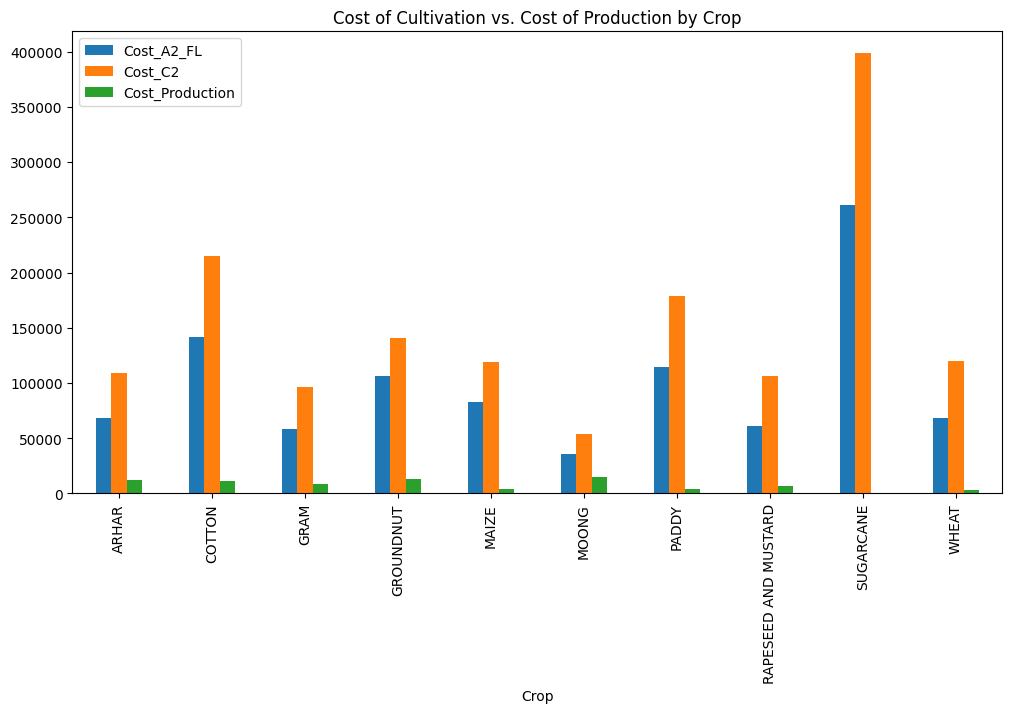

In [35]:
cols = d1.columns
d1.groupby('Crop')[cols[:-1]].sum().plot(kind='bar', figsize=(12,6)),
plt.title('Cost of Cultivation vs. Cost of Production by Crop')

<ipython-input-36-a34cbded0eba>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='Duration'>

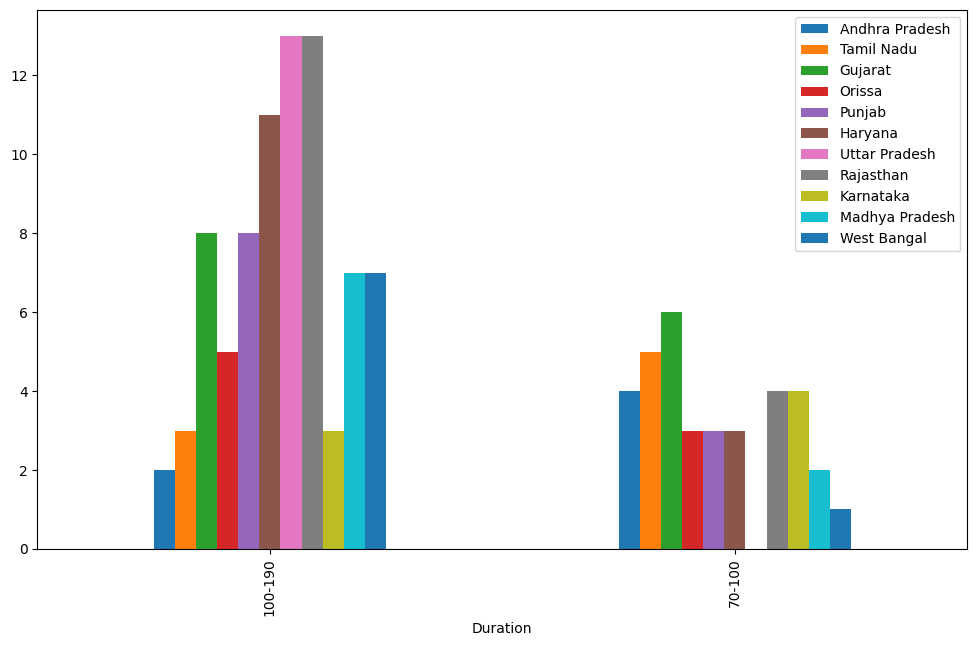

In [36]:
df = d3.groupby('Crop').sum(),
df = pd.DataFrame(d3.groupby('Season/ duration in days').count().reset_index())
df1 = pd.DataFrame([df.loc[1:27].sum(),df.loc[29:37].sum()])
df1.drop('Season/ duration in days',axis=1,inplace=True)
df1 = df1.assign(Duration = ['100-190','70-100'])
df1[['Andhra Pradesh', 'Tamil Nadu',
       'Gujarat', 'Orissa', 'Punjab', 'Haryana', 'Uttar Pradesh', 'Rajasthan',
       'Karnataka', 'Madhya Pradesh', 'West Bangal', 'Duration']].plot(x = 'Duration',kind='bar',figsize=(12,7))

Uttar Pradesh and Rajasthan are ideal for longer-season crops, while Gujarat is favorable for shorter-season crops, emphasizing the importance of regional suitability in crop selection.

The higher cost of cultivation compared to production for sugarcane suggests the need to address cost-efficiency, while fluctuations in crop production highlight the impact of various factors on agriculture, making careful planning essential.